This is a collection of google Colab notebooks that I created while following edx.com's "Data Science for Construction, Architecture and Engineering" course by Clayton Miller.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib


In [2]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

In [5]:
ls

Office_Abbey.csv         PrimClass_Emilio.csv      UnivClass_Tamra.csv
Office_Abigail.csv       PrimClass_Emily.csv       UnivClass_Teri.csv
Office_Abigail.gsheet    PrimClass_Eoghan.csv      UnivClass_Therese.csv
Office_Alannah.csv       PrimClass_Ernest.csv      UnivDorm_Adan.csv
Office_Al.csv            PrimClass_Ernesto.csv     UnivDorm_Adriana.csv
Office_Aliyah.csv        PrimClass_Ervin.csv       UnivDorm_Ahmad.csv
Office_Allyson.csv       PrimClass_Esmeralda.csv   UnivDorm_Alex.csv
Office_Alyson.csv        PrimClass_Ethan.csv       UnivDorm_Alka.csv
Office_Amelia.csv        PrimClass_Ethel.csv       UnivDorm_Alonzo.csv
Office_Amelie.csv        PrimClass_Eva.csv         UnivDorm_Alphonso.csv
Office_Anastasia.csv     PrimClass_Everett.csv     UnivDorm_Alyshialynn.csv
Office_Andrea.csv        PrimClass_Evie.csv        UnivDorm_Alyssa.csv
Office_Angelica.csv      PrimClass_Ezekiel.csv     UnivDorm_Antonio.csv
Office_Angelina.csv      PrimClass_Ezra.csv        UnivDorm_April.csv
Offi

In [6]:
df = pd.read_csv('Office_Amelie.csv', index_col = "timestamp", parse_dates=True) 

In [7]:
df.head()

,Office_Amelie
timestamp,
2015-01-01 00:00:00,11.81
2015-01-01 01:00:00,11.29
2015-01-01 02:00:00,12.02
2015-01-01 03:00:00,11.45
2015-01-01 04:00:00,11.85


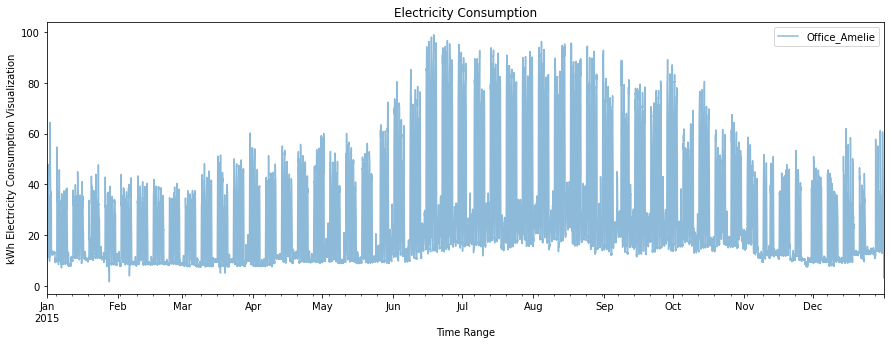

In [8]:
df.plot(alpha=0.5, figsize=(15, 5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

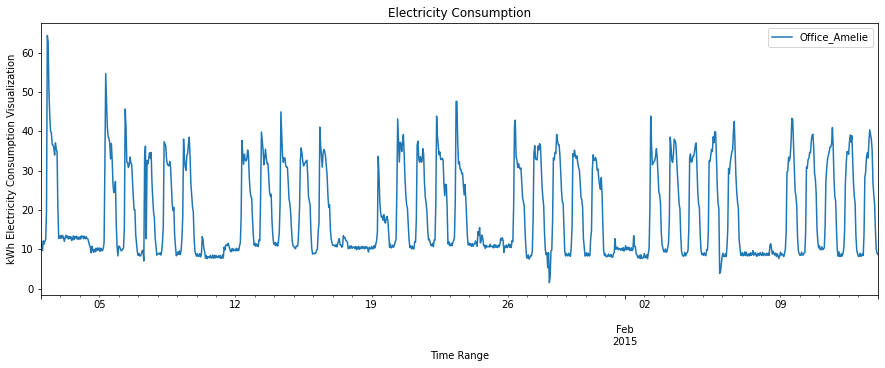

In [9]:
df.truncate(before='01-02-2015', after='14-02-2015').plot(figsize=(15,5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

## Conventional Daily Profile Analysis - Weekday vs. Weekend

It appears that there is some standard weekday vs. weekend behaviour and a few basic types of daily patterns.

Let's first do it the conventional way by looking at all the daily profiles. We'll pivot to get a DataFrame that can be plotted the way we needed.

In [10]:
df['Date'] = df.index.map(lambda t: t.date())
df['Time'] = df.index.map(lambda t: t.time())

In [11]:
df.head()

,Office_Amelie,Date,Time
timestamp,,,
2015-01-01 00:00:00,11.81,2015-01-01,00:00:00
2015-01-01 01:00:00,11.29,2015-01-01,01:00:00
2015-01-01 02:00:00,12.02,2015-01-01,02:00:00
2015-01-01 03:00:00,11.45,2015-01-01,03:00:00
2015-01-01 04:00:00,11.85,2015-01-01,04:00:00


In [12]:
df_pivot = pd.pivot_table(df, values='Office_Amelie', index='Date', columns='Time')


In [13]:
df_pivot.head()


Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.81,11.29,12.02,11.45,11.85,11.02,12.11,11.39,47.91,47.53,40.15,36.23,34.51,35.25,31.88,31.03,31.90,33.55,33.60,35.24,35.52,19.07,11.71,11.06
2015-01-02,11.87,11.19,9.71,12.18,11.38,12.12,12.47,19.86,64.34,62.68,50.13,44.10,40.07,39.66,36.68,36.51,35.82,33.99,37.08,35.50,34.77,20.80,12.78,13.39
2015-01-03,12.86,13.59,12.86,13.53,12.90,12.06,13.02,13.64,12.96,13.38,12.65,13.31,12.78,13.23,12.29,12.53,13.46,12.49,13.26,12.92,13.40,12.61,13.12,12.54
2015-01-04,13.17,12.64,13.47,13.01,13.37,12.73,13.37,12.72,13.20,12.78,12.70,11.90,11.12,10.49,9.14,10.82,9.92,9.29,10.01,9.41,10.31,9.63,10.37,9.85
2015-01-05,10.38,9.51,10.30,9.67,9.70,10.27,11.73,31.82,54.69,47.74,41.12,38.71,38.17,37.06,33.00,36.94,32.56,26.46,24.44,25.47,27.26,16.56,10.75,8.38


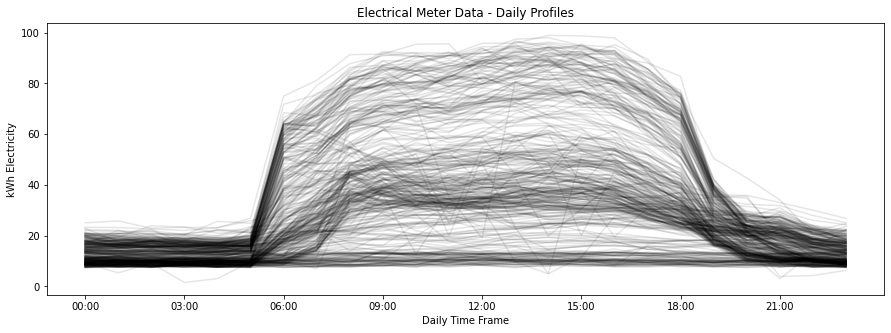

In [14]:
df_pivot.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

In [15]:
df['Weekday'] = df.index.map(lambda t: t.date().weekday())

In [16]:
df.head()


,Office_Amelie,Date,Time,Weekday
timestamp,,,,
2015-01-01 00:00:00,11.81,2015-01-01,00:00:00,3
2015-01-01 01:00:00,11.29,2015-01-01,01:00:00,3
2015-01-01 02:00:00,12.02,2015-01-01,02:00:00,3
2015-01-01 03:00:00,11.45,2015-01-01,03:00:00,3
2015-01-01 04:00:00,11.85,2015-01-01,04:00:00,3


In [17]:
df_pivot_weekday = pd.pivot_table(df[(df.Weekday < 5)], values='Office_Amelie', index='Date', columns='Time')


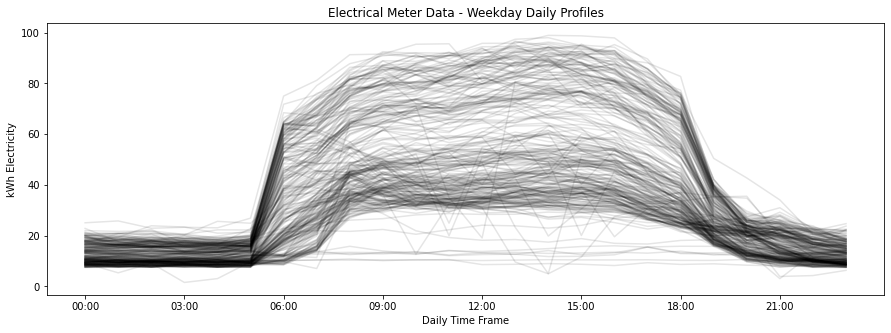

In [18]:
df_pivot_weekday.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

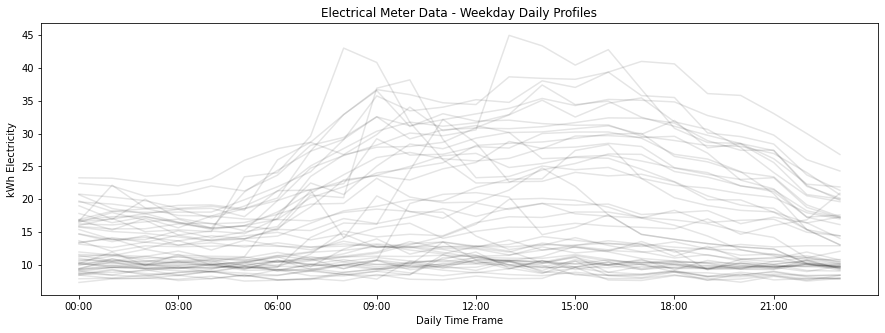

In [19]:
df_pivot_weekend = pd.pivot_table(df[(df.Weekday > 5)], values='Office_Amelie', index='Date', columns='Time')
df_pivot_weekend.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

In [20]:
df = pd.read_csv('Office_Amelie.csv', index_col = "timestamp", parse_dates=True) 

In [21]:
df.head()

,Office_Amelie
timestamp,
2015-01-01 00:00:00,11.81
2015-01-01 01:00:00,11.29
2015-01-01 02:00:00,12.02
2015-01-01 03:00:00,11.45
2015-01-01 04:00:00,11.85


In [22]:
df_norm = (df - df.mean()) / (df.max() - df.min()) 

df['Time'] = df.index.map(lambda t: t.time())
df['Date'] = df.index.map(lambda t: t.date())
df_norm['Time'] = df_norm.index.map(lambda t: t.time())
df_norm['Date'] = df_norm.index.map(lambda t: t.date())

In [23]:
df.head()

,Office_Amelie,Time,Date
timestamp,,,
2015-01-01 00:00:00,11.81,00:00:00,2015-01-01
2015-01-01 01:00:00,11.29,01:00:00,2015-01-01
2015-01-01 02:00:00,12.02,02:00:00,2015-01-01
2015-01-01 03:00:00,11.45,03:00:00,2015-01-01
2015-01-01 04:00:00,11.85,04:00:00,2015-01-01


In [24]:
dailyblocks = pd.pivot_table(df, values='Office_Amelie', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm = pd.pivot_table(df_norm, values='Office_Amelie', index='Date', columns='Time', aggfunc='mean')

In [25]:
dailyblocks_norm.head()


Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.173553,-0.178896,-0.171395,-0.177252,-0.173142,-0.181670,-0.170471,-0.177868,0.197360,0.193455,0.117629,0.077352,0.059680,0.067283,0.032658,0.023925,0.032863,0.049816,0.050330,0.067181,0.070057,-0.098960,-0.174581,-0.181259
2015-01-02,-0.172937,-0.179923,-0.195130,-0.169751,-0.177971,-0.170368,-0.166772,-0.090843,0.366171,0.349115,0.220169,0.158213,0.116807,0.112594,0.081976,0.080229,0.073140,0.054337,0.086086,0.069852,0.062351,-0.081185,-0.163587,-0.157319
2015-01-03,-0.162765,-0.155264,-0.162765,-0.155881,-0.162354,-0.170984,-0.161121,-0.154751,-0.161737,-0.157422,-0.164922,-0.158141,-0.163587,-0.158963,-0.168621,-0.166155,-0.156600,-0.166566,-0.158655,-0.162148,-0.157216,-0.165333,-0.160093,-0.166053
2015-01-04,-0.159580,-0.165025,-0.156497,-0.161224,-0.157525,-0.164100,-0.157525,-0.164203,-0.159271,-0.163587,-0.164409,-0.172628,-0.180643,-0.187116,-0.200986,-0.183725,-0.192972,-0.199445,-0.192047,-0.198212,-0.188965,-0.195952,-0.188348,-0.193691
2015-01-05,-0.188246,-0.197185,-0.189068,-0.195541,-0.195232,-0.189376,-0.174375,0.032041,0.267021,0.195613,0.127595,0.102833,0.097285,0.085880,0.044165,0.084647,0.039645,-0.023030,-0.043785,-0.033202,-0.014811,-0.124749,-0.184444,-0.208795


In [26]:
dailyblocksmatrix_norm = np.matrix(dailyblocks_norm.dropna())
centers, _ = kmeans(dailyblocksmatrix_norm, 4, iter=10000)
cluster, _ = vq(dailyblocksmatrix_norm, centers)

In [27]:
clusterdf = pd.DataFrame(cluster, columns=['ClusterNo'])

In [28]:
dailyclusters = pd.concat([dailyblocks.dropna().reset_index(), clusterdf], axis=1) 

In [29]:
dailyclusters.head()

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,ClusterNo
0,2015-01-01,11.81,11.29,12.02,11.45,11.85,11.02,12.11,11.39,47.91,47.53,40.15,36.23,34.51,35.25,31.88,31.03,31.90,33.55,33.60,35.24,35.52,19.07,11.71,11.06,1
1,2015-01-02,11.87,11.19,9.71,12.18,11.38,12.12,12.47,19.86,64.34,62.68,50.13,44.10,40.07,39.66,36.68,36.51,35.82,33.99,37.08,35.50,34.77,20.80,12.78,13.39,0
2,2015-01-03,12.86,13.59,12.86,13.53,12.90,12.06,13.02,13.64,12.96,13.38,12.65,13.31,12.78,13.23,12.29,12.53,13.46,12.49,13.26,12.92,13.40,12.61,13.12,12.54,3
3,2015-01-04,13.17,12.64,13.47,13.01,13.37,12.73,13.37,12.72,13.20,12.78,12.70,11.90,11.12,10.49,9.14,10.82,9.92,9.29,10.01,9.41,10.31,9.63,10.37,9.85,3
4,2015-01-05,10.38,9.51,10.30,9.67,9.70,10.27,11.73,31.82,54.69,47.74,41.12,38.71,38.17,37.06,33.00,36.94,32.56,26.46,24.44,25.47,27.26,16.56,10.75,8.38,1


In [30]:
x = dailyclusters.groupby('ClusterNo').mean().sum(axis=1).sort_values()
x = pd.DataFrame(x.reset_index())
x['ClusterNo2'] = x.index
x = x.set_index('ClusterNo')
x = x.drop([0], axis=1)
dailyclusters = dailyclusters.merge(x, how='outer', left_on='ClusterNo', right_index=True)

In [31]:
dailyclusters = dailyclusters.drop(['ClusterNo'],axis=1)
dailyclusters = dailyclusters.set_index(['ClusterNo2','Date']).T.sort_index()

In [32]:
dailyclusters.head()

ClusterNo2          1                        ...          3                      
Date       2015-01-01 2015-01-05 2015-01-06  ... 2015-10-13 2015-10-14 2015-10-15
00:00:00        11.81      10.38      10.85  ...      19.86      15.61      15.48
01:00:00        11.29       9.51      10.71  ...      15.50      15.19      16.37
02:00:00        12.02      10.30      10.26  ...      15.34      15.63      15.71
03:00:00        11.45       9.67       9.66  ...      16.45      15.21      15.75
04:00:00        11.85       9.70       9.75  ...      14.46      15.63      15.06

[5 rows x 365 columns]

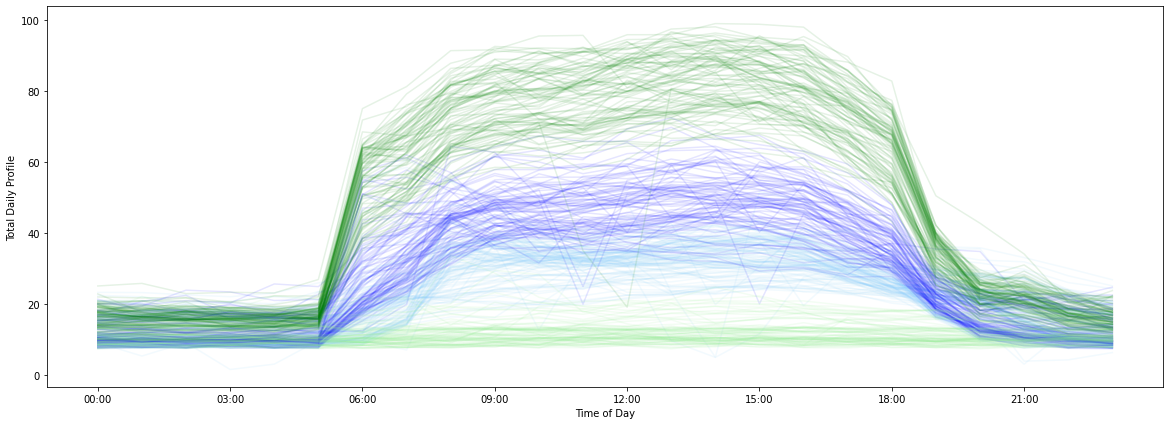

In [33]:
clusterlist = list(dailyclusters.columns.get_level_values(0).unique())
matplotlib.rcParams['figure.figsize'] = 20, 7

styles2 = ['LightSkyBlue', 'b','LightGreen', 'g','LightCoral','r','SandyBrown','Orange','Plum','Purple','Gold','b']
fig, ax = plt.subplots()
for col, style in zip(clusterlist, styles2):
    dailyclusters[col].plot(ax=ax, legend=False, style=style, alpha=0.1, xticks=np.arange(0, 86400, 10800))

ax.set_ylabel('Total Daily Profile')
ax.set_xlabel('Time of Day');

In [34]:
def timestampcombine(date,time):
    pydatetime = datetime.combine(date, time)
    return pydatetime

In [35]:
def ClusterUnstacker(df):
    df = df.unstack().reset_index()
    df['timestampstring'] = pd.to_datetime(df.Date.astype("str") + " " + df.level_2.astype("str"))
    #pd.to_datetime(df.Date  df.level_2) #map(timestampcombine, )
    df = df.dropna()
    return df

In [36]:
dailyclusters.unstack().reset_index().head()

,ClusterNo2,Date,level_2,0
0,1,2015-01-01,00:00:00,11.81
1,1,2015-01-01,01:00:00,11.29
2,1,2015-01-01,02:00:00,12.02
3,1,2015-01-01,03:00:00,11.45
4,1,2015-01-01,04:00:00,11.85


In [37]:
dfclusterunstacked = ClusterUnstacker(dailyclusters)
dfclusterunstackedpivoted = pd.pivot_table(dfclusterunstacked, values=0, index='timestampstring', columns='ClusterNo2')

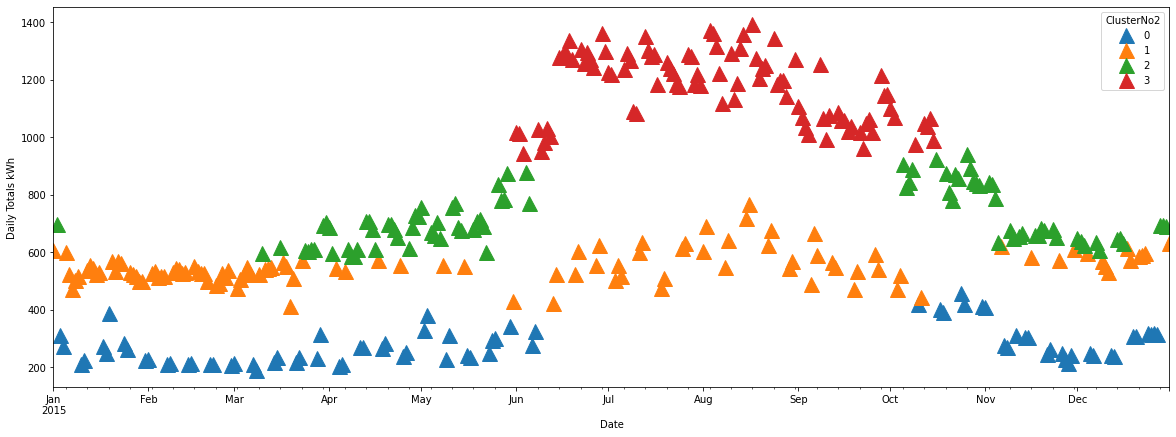

In [38]:
clusteravgplot = dfclusterunstackedpivoted.resample('D').sum().replace(0, np.nan).plot(style="^",markersize=15)
clusteravgplot.set_ylabel('Daily Totals kWh')
clusteravgplot.set_xlabel('Date');

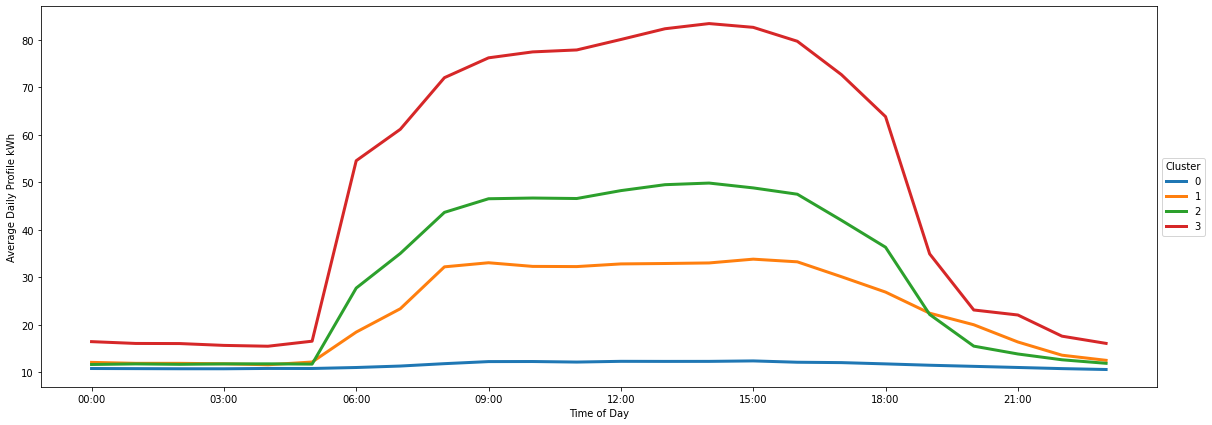

In [39]:
dfclusterunstackedpivoted['Time'] = dfclusterunstackedpivoted.index.map(lambda t: t.time())
dailyprofile = dfclusterunstackedpivoted.groupby('Time').mean().plot(figsize=(20,7),linewidth=3, xticks=np.arange(0, 86400, 10800))
dailyprofile.set_ylabel('Average Daily Profile kWh')
dailyprofile.set_xlabel('Time of Day')
dailyprofile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')

In [40]:
def DayvsClusterMaker(df):
    df.index = df.timestampstring
    df['Weekday'] = df.index.map(lambda t: t.date().weekday())
    df['Date'] = df.index.map(lambda t: t.date())
    df['Time'] = df.index.map(lambda t: t.time())
    DayVsCluster = df.resample('D').mean().reset_index(drop=True)
    DayVsCluster = pd.pivot_table(DayVsCluster, values=0, index='ClusterNo2', columns='Weekday', aggfunc='count')
    DayVsCluster.columns = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
    return DayVsCluster.T

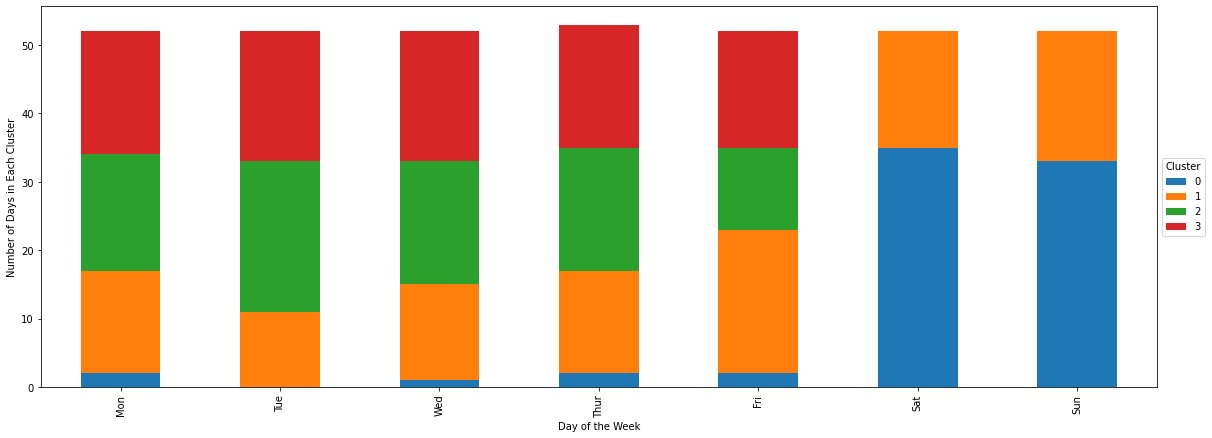

In [41]:
DayVsCluster = DayvsClusterMaker(dfclusterunstacked)
DayVsClusterplot1 = DayVsCluster.plot(figsize=(20,7),kind='bar',stacked=True)
DayVsClusterplot1.set_ylabel('Number of Days in Each Cluster')
DayVsClusterplot1.set_xlabel('Day of the Week')
DayVsClusterplot1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')

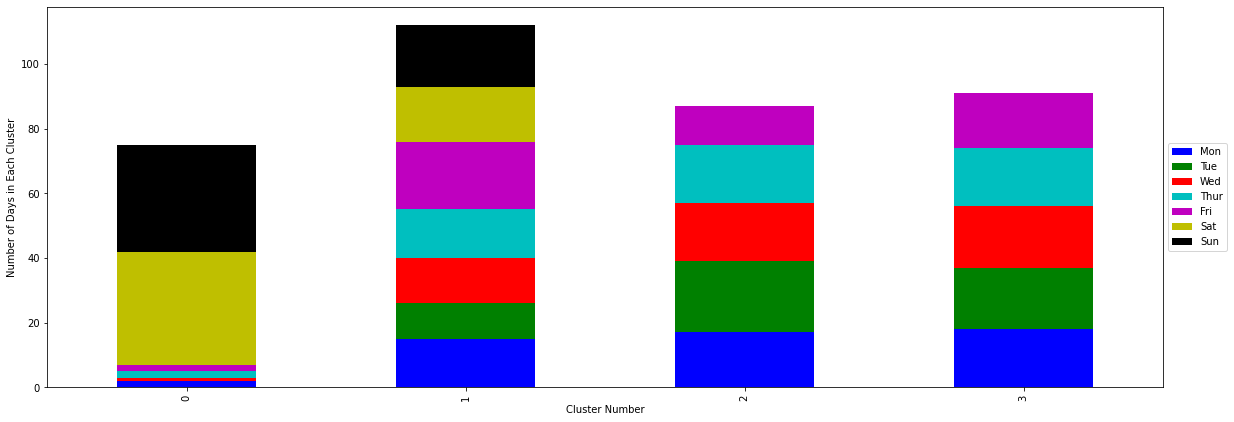

In [42]:
DayVsClusterplot2 = DayVsCluster.T.plot(figsize=(20,7),kind='bar',stacked=True, color=['b','g','r','c','m','y','k']) #, color=colors2
DayVsClusterplot2.set_ylabel('Number of Days in Each Cluster')
DayVsClusterplot2.set_xlabel('Cluster Number')
DayVsClusterplot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))